# How do you optimise the wheel size to minimise potential energy in the moving vehicle?
## William Bourne, Feb 2021

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

### Defining Vehicle Properties

In [28]:
density = 10.93                     # kg/m^2    density of the wheel in terms of the CSA
max_driving_force = 10               # N         what total driving force do the wheels need to exert on the ground
travel_dist = 8                     # m        Total distance to travel
travel_time = 120                   # s         How long is the journey allowed to take?
static_mass = 0.7                   # kg        the non-rotating mass of the vehicle
mu = 0.71                           #           coefficient of dynamic friction for the driveshaft   
r_ds = 0.003                        # m.        driveshaft radius

### Defining Simulation Parameters

In [29]:
num_data_points = 2000
max_wheel_radius = 0.1      # m     maximum wheel radius to simulate
g = 9.81                    # m/s^2 acceleration due to gravity

### Finding Energy stored by rotating wheel

In [30]:
r = np.linspace(1e-50, max_wheel_radius, num_data_points)       # m      wheel radius

omega = travel_dist / (r * travel_time)         # rad/s     wheel rotation speed
mass = density*np.pi*r**2                       # kg        mass of a single wheel
I = 0.5*mass*r**2                               #           Mass Moment of inertia
rot_E = 0.5 * I * omega**2                      # J         the rotational kinetic energy in a wheel

### Finding energy stored by moving vehicle

In [31]:
total_mass = static_mass + 4*mass                 # kg        total mass of repeatable vehicle
vel = travel_dist / travel_time                 # m/s       required speed of vehicle
lin_E = 0.5*total_mass*vel**2

### Find total kinetic energy in moving vehicle & Plot results

Text(0, 0.5, 'Energy, J')

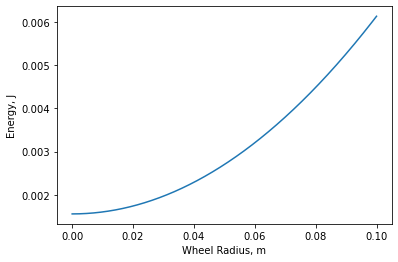

In [32]:
E = lin_E + 4*rot_E
plt.plot(r, E)
plt.xlabel('Wheel Radius, m')
plt.ylabel('Energy, J')

### In Conclusion
As you increase the wheel radius, The kinetic energy stored in the vehicle. To store the minimum potential energy whilst driving, you should have the minimum feasable wheel size. However, remember that the higher wheel rotation speeds required with a small wheel will result in more energy loss due to friction & accelerated wear & tear of spinning componants.


Text(0, 0.5, 'Required Rotation Speed, rpm')

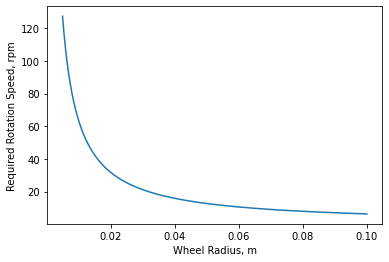

In [33]:
mask = r > 0.005                   # prevent asymptote flattening useful graph data
plt.plot(r[mask], omega[mask]*((1/(2*np.pi))*60))
plt.xlabel('Wheel Radius, m')
plt.ylabel('Required Rotation Speed, rpm')

  
  
   

# What motor torque is needed?

Text(0, 0.5, 'Motor Torque Needed, Nm')

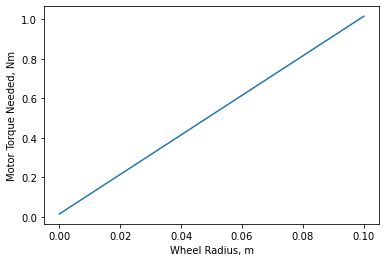

In [34]:
torque_ds = mu * static_mass * g * r_ds        # Nm   friction torque in the driveshaft
wheel_torque = (max_driving_force / 2) * r     # Nm   find the torque needed at each wheel

motor_torque = wheel_torque*2 + torque_ds

plt.plot(r, motor_torque)
plt.xlabel('Wheel Radius, m')
plt.ylabel('Motor Torque Needed, Nm')

# Finding Specific Values

In [37]:
specified_radius = 0.02     # m
spec_motor_torque = np.interp(specified_radius, r, motor_torque)
spec_rot_speed = np.interp(specified_radius, r, omega)
spec_rot_energy = np.interp(specified_radius, r, E)

d = {'wheel radius': [specified_radius], 'motor torque': [spec_motor_torque], 'wheel speed': [spec_rot_speed], 'potential energy':[spec_rot_energy]}
pd.DataFrame(data=d)

,wheel radius,motor torque,wheel speed,potential energy
0,0.02,0.214627,3.333337,0.001739
